 ###  Employees Salary Prediction

In [ ]:
import pandas as pd
import sklearn as sk
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

import warnings
warnings.filterwarnings('ignore')

from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,root_mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor


In [114]:
#importing data
df = pd.read_csv(r'C:\Users\chandan\Downloads\Salary_Data.csv')
df 

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


###   Number of row and column

In [116]:
df.shape

(6704, 6)

In [133]:
df.tail()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's,Marketing Manager,14.0,140000.0
6703,26.0,Female,High School,Sales Executive,1.0,35000.0


In [117]:
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


###   showing first five dataset

In [118]:
# showing firat 5 data
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [119]:
#null value
df.isna()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
6699,False,False,False,False,False,False
6700,False,False,False,False,False,False
6701,False,False,False,False,False,False
6702,False,False,False,False,False,False


In [120]:
df.isna().sum()

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64

In [121]:
print(df.Gender.value_counts())

Gender
Male      3674
Female    3014
Other       14
Name: count, dtype: int64


In [122]:
print(df['Education Level'].value_counts())

Education Level
Bachelor's Degree    2267
Master's Degree      1573
PhD                  1368
Bachelor's            756
High School           448
Master's              288
phD                     1
Name: count, dtype: int64


In [127]:
# Combining repeating Values of Education Level
df['Education Level'].replace(["Bachelor's Degree","Master's Degree"],["Bachelor's","Master's"],inplace=True)
df['Education Level'].value_counts()

Education Level
Bachelor's     3023
Master's       1861
PhD            1368
High School     448
phD               1
Name: count, dtype: int64

In [128]:
print(df['Job Title'].value_counts())

Job Title
Software Engineer                 518
Data Scientist                    453
Software Engineer Manager         376
Data Analyst                      363
Senior Project Engineer           318
                                 ... 
Junior Social Media Specialist      1
Senior Software Architect           1
Developer                           1
Social M                            1
Social Media Man                    1
Name: count, Length: 193, dtype: int64


In [129]:
print(df['Years of Experience'].value_counts())


Years of Experience
2.0     610
3.0     602
1.0     540
4.0     522
6.0     439
8.0     426
5.0     399
9.0     380
7.0     353
11.0    320
12.0    294
14.0    253
16.0    242
13.0    209
10.0    192
15.0    129
18.0    126
19.0    121
0.0     120
17.0    106
20.0     61
22.0     47
21.0     42
23.0     37
25.0     24
24.0     19
28.0     16
29.0     12
1.5      12
27.0     11
32.0     10
26.0      7
30.0      6
33.0      6
31.0      5
34.0      2
0.5       1
Name: count, dtype: int64


In [130]:
print(df['Age'].value_counts())


Age
27.0    517
30.0    449
29.0    444
28.0    429
33.0    398
26.0    394
31.0    365
32.0    351
34.0    309
25.0    284
36.0    282
24.0    240
35.0    200
42.0    176
39.0    158
43.0    158
37.0    156
38.0    149
45.0    144
41.0    129
44.0    126
23.0    104
46.0    102
48.0     98
40.0     92
49.0     91
50.0     88
54.0     68
47.0     47
51.0     30
52.0     29
21.0     18
55.0     16
22.0     15
56.0     11
57.0      9
53.0      7
58.0      7
62.0      5
60.0      5
61.0      2
Name: count, dtype: int64


### Exploratory Data Analysis

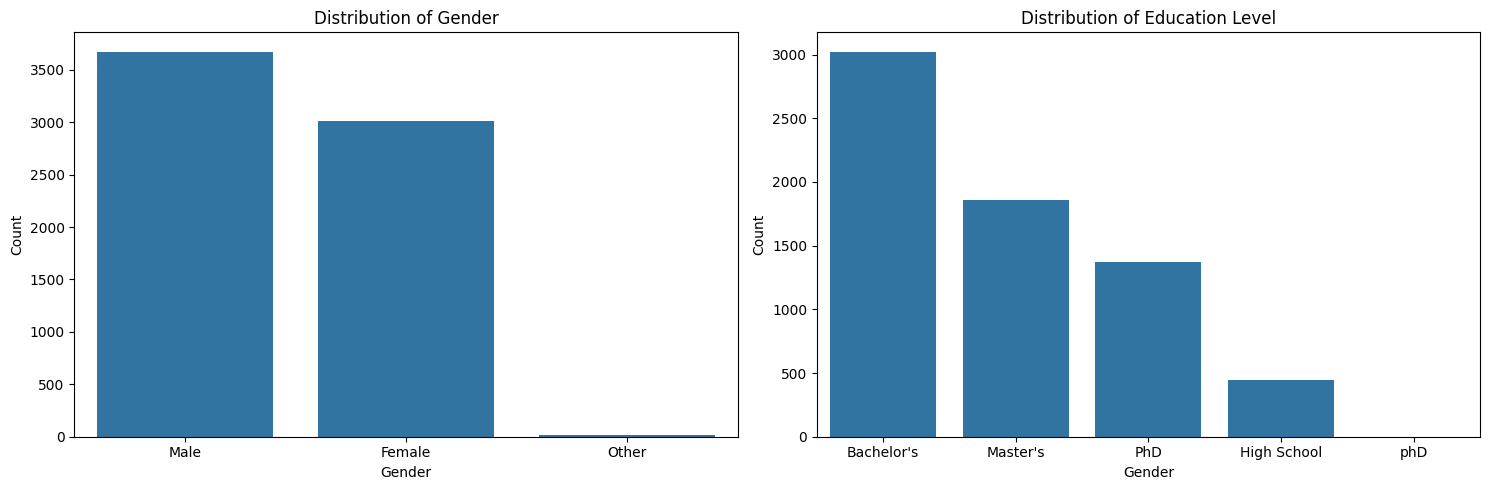

In [131]:
#create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
#plot the count of data points for gender category in the first subplot
sns.countplot(x='Gender' , data=df, ax=ax[0])
#plot the count of the points for eacheducation level category in the second subplot
sns.countplot(x='Education Level', data=df, ax=ax[1])

#add labels and titles for the subplots
ax[0].set_xlabel('Gender')
ax[0].set_ylabel('Count')
ax[0].set_title('Distribution of Gender')

ax[1].set_xlabel('Gender')
ax[1].set_ylabel('Count')
ax[1].set_title('Distribution of Education Level')

#show the plots
plt.tight_layout()
plt.show()

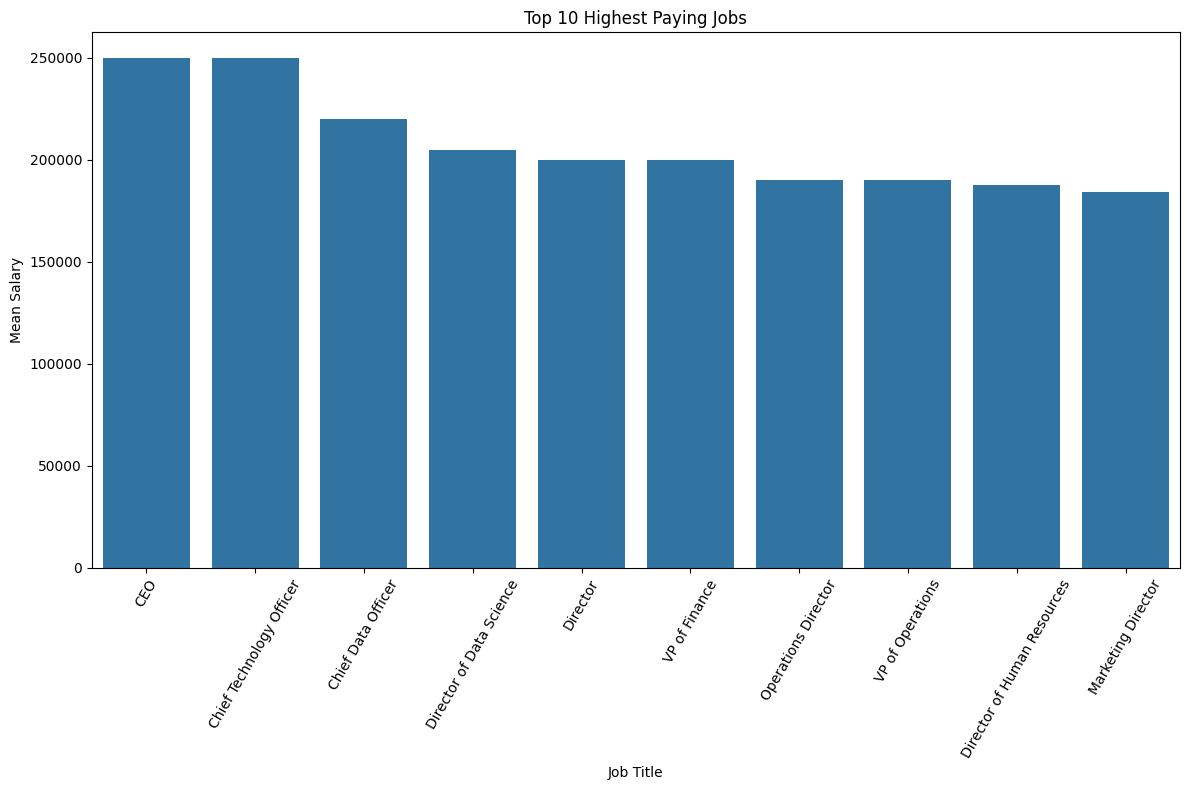

In [135]:
#get the top 10 job titles with the highest mean salary
top_10_highest_paying_jobs = df.groupby('Job Title')['Salary'].mean().nlargest(10)

#create a single bar plot for the top 10 highest paying job titles ans their mean salaries
plt.figure(figsize=(12,8))
sns.barplot(x=top_10_highest_paying_jobs.index, y=top_10_highest_paying_jobs.values)

#Customize the plot
plt.xlabel('Job Title')
plt.ylabel('Mean Salary')
plt.title('Top 10 Highest Paying Jobs')
plt.xticks(rotation=60)   #Rotate x-axies labels if needed

#show the plot
plt.tight_layout()
plt.show()


In [45]:
#Reducing job titles by omitting titles with less than 25 counts
job_title_count = df['Job Title'].value_counts()
job_title_edited = job_title_count[job_title_count<=25]
job_title_edited.count()

np.int64(144)

In [46]:
#Omitting titles with less than 25 counts
df['Job Title'] = df['Job Title'].apply(lambda x: 'others' if x in job_title_edited else x)
df['Job Title'].nunique()

50

In [47]:
#combining repeating values of education level
df['Education Level'].replace(["Bachelor's Degree","Master's Degree","phd"],["Bachelor's","Master's","PhD"],inplace=True)
df['Education Level'].value_counts()

Education Level
Bachelor's     3023
Master's       1861
PhD            1368
High School     448
phD               1
Name: count, dtype: int64

In [48]:
df.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

In [105]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
#labelencoder = preprocessing.LabelEncoder()
labelencoder = LabelEncoder()
df['Gender']=labelencoder.fit_transform(df['Gender'])  # male = 1 , female=0
df['Education Level']=labelencoder.fit_transform(df['Education Level']) 
df['Job Title']=labelencoder.fit_transform(df['Job Title']) 
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,1,0,46,5.0,90000.0
1,28.0,0,2,2,3.0,65000.0
2,45.0,1,3,49,15.0,150000.0
3,36.0,0,0,33,7.0,60000.0
4,52.0,1,2,49,20.0,200000.0


### Predicting Salary

In [84]:
q1 = df.Salary.quantile(0.25)
q3 = df.Salary.quantile(0.75)

iqr = q3-q1
lower = q1-1.5*iqr
upper = q3+1.5*iqr

In [85]:
df[df.Salary>upper]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary


In [86]:
df[df.Salary>lower]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,1,0,46,5.0,90000.0
1,28.0,0,2,2,3.0,65000.0
2,45.0,1,3,49,15.0,150000.0
3,36.0,0,0,33,7.0,60000.0
4,52.0,1,2,49,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,0,3,7,20.0,200000.0
6700,32.0,1,1,33,3.0,50000.0
6701,30.0,0,0,9,4.0,55000.0
6702,46.0,1,2,26,14.0,140000.0


### Converting categorical job Titile into a numerical format

In [87]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
#labelencoder = preprocessing.LabelEncoder()
labelencoder = LabelEncoder()
df['Gender']=labelencoder.fit_transform(df['Gender'])  # male = 1 , female=0
df['Education Level']=labelencoder.fit_transform(df['Education Level']) 
df['Job Title']=labelencoder.fit_transform(df['Job Title']) 
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,1,0,46,5.0,90000.0
1,28.0,0,2,2,3.0,65000.0
2,45.0,1,3,49,15.0,150000.0
3,36.0,0,0,33,7.0,60000.0
4,52.0,1,2,49,20.0,200000.0


In [65]:
#x=df.drop(columns=['Salary']) #input
x = df.drop('Salary',axis=1)
target = df['Salary']
#y=df['Salary']#output

In [52]:
y    

0        90000.0
1        65000.0
2       150000.0
3        60000.0
4       200000.0
          ...   
6699    200000.0
6700     50000.0
6701     55000.0
6702    140000.0
6703     35000.0
Name: Salary, Length: 6704, dtype: float64

In [88]:
xtrain, xtest, ytrain, ytest= train_test_split(x, y, test_size=0.25, random_state=42)
xtrain.shape


(112, 4)

### Create a directionary for defining models and tuning hyperparameters


In [69]:
model_params = {
    'Linear_regression':{
        'model':LinearRegression(),
        'params':{
        }
    },
    'Decision_Tree':{
        'model':DecisionTreeRegressor(),
        'params':{
            'max_depth':[2,4,6,8,100],
            'random_state':[0,42],
            'min_samples_split':[1,5,10,20]
        }
    },
    'Random_Forest':{
        'model':RandomForestRegressor(),
        'params':{
            'n_estimators':[10,30,20,50,80]
        }
    }
}

In [70]:
score=[]
for model_name,m in model_params.items():
    clf = GridSearchCV(m['model'],m['params'],cv=5,scoring='neg_mean_squared_error')
    clf.fit(xtrain,ytrain)

    score.append({
    'Model':model_name,
    'Params':clf.best_params_,
    'MSE(-ve)':clf.best_score_
    })
    pd.DataFrame(score)

In [71]:
s = pd.DataFrame(score)
sort = s.sort_values(by = 'MSE(-ve)',ascending=False)
sort

,Model,Params,MSE(-ve)
2,Random_Forest,{'n_estimators': 10},-0.041250
0,Linear_regression,{},-0.055279
1,Decision_Tree,"{'max_depth': 4, 'min_samples_split': 10, 'ran...",-0.059565


### Linear Regression Model

In [136]:
lr = LinearRegression()
lr.fit(xtrain,ytrain)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [137]:
lr.score(xtest,ytest)

0.9487283360348984

In [138]:
y_pred_lr = lr.predict(xtest)
print("Mean Squared Error :",mean_squared_error(ytest,y_pred_lr))
print("Mean Absolute Error :",mean_absolute_error(ytest,y_pred_lr))
print("Root Mean Squared Error :",root_mean_squared_error(ytest,y_pred_lr))

Mean Squared Error : 0.03611030626905014
Mean Absolute Error : 0.14443140820853126
Root Mean Squared Error : 0.19002711982517162


### Decision Tree Model¶

In [141]:
dtr = DecisionTreeRegressor(max_depth=10,min_samples_split=2,random_state=0)
dtr.fit(xtrain,ytrain)

,criterion,'squared_error'
,splitter,'best'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [142]:
dtr.score(xtest,ytest)

1.0

In [143]:
y_pred_dtr = dtr.predict(xtest)
print("Mean Squared Error :",mean_squared_error(ytest,y_pred_dtr))
print("Mean Absolute Error :",mean_absolute_error(ytest,y_pred_dtr))
print("Root Mean Squared Error :",root_mean_squared_error(ytest,y_pred_dtr))

Mean Squared Error : 0.0
Mean Absolute Error : 0.0
Root Mean Squared Error : 0.0


### RandomForest Model

In [139]:
rfr = RandomForestRegressor(n_estimators=20)
rfr.fit(xtrain,ytrain)

,n_estimators,20
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [140]:
rfr.score(xtest,ytest)

1.0

In [95]:
y_pred_rfr = rfr.predict(xtest)
print("Mean Squared Error :",mean_squared_error(ytest,y_pred_rfr))
print("Mean Absolute Error :",mean_absolute_error(ytest,y_pred_rfr))
print("Root Mean Squared Error :",root_mean_squared_error(ytest,y_pred_rfr))

Mean Squared Error : 0.0005921052631578959
Mean Absolute Error : 0.006578947368421058
Root Mean Squared Error : 0.024333213169614405
